### Capstone Project: Marketing Campaign
### DTSC691: Default Machine Learning Project
### Name: Tenaw Derseh

Problem Statement:

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

 

Why ML Model: Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

This will save resource and their time ( which is directly involved in the cost ( resource billing)).

Develop model with Duration and without duration feature and report the performance of the model.

Duration feature is not recommended as this will be difficult to explain the result to business and also it will

be difficult for business to campaign based on duration.

In [1]:
# impoprt important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%time
import warnings
warnings.filterwarnings('ignore')

CPU times: total: 0 ns
Wall time: 0 ns


Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

I will focus in the following steps

1. download the data and data clean up, prepation and transformation

2. conduct EDA

3. design some hypotheses regareding individual featuers

4. modeling

5. conducting grid shearch to select optimal combination of parameters

6. apply different metrics to check the efficiency of the model

7. choose the bestor most effective models based on its performance 

8. prepare presentation


In [2]:
# delimiter from panda packages
data_bank = pd.read_csv('bank.csv', delimiter = ';')
data_bank_full = pd.read_csv('bank-full.csv', delimiter= ';')
data_bank_add_full = pd.read_csv('bank-additional-full.csv', delimiter = ';')
data_bank_add = pd.read_csv('bank-additional.csv', delimiter = ';')


# Data exploration

In [3]:
# get high leven information about the data frame
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# get more infrotrmation about the data set
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# learn a bit about the shape of the data frame
data_bank.shape

(4521, 17)

In [6]:
# checking unique features
data_bank.columns.unique()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# checking any missing values
data_bank.isna().sum().sum()

0

In [8]:
# learn about the data
data_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
# learn a bit more about the data types, size and getting more information.
data_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# checking shape
data_bank_full.shape

(45211, 17)

In [11]:
# checking unique features
data_bank_full.columns.unique()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
# checking any missing values
data_bank_full.isna().sum().sum()

0

In [13]:
# take a look what looks like the data in this specific data farme
data_bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# learn more about the data
data_bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
#checking unique features
data_bank_add_full.columns.unique()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
# checking shape
data_bank_add_full.shape

(41188, 21)

In [17]:
data_bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [18]:
data_bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [19]:
data_bank_add.columns.unique()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# combining different data frames together
combine multiple data frames together to make it sure all important featurs are included
according to attribute information banck client data has 20 features and 1 respons. to get thes I need to merge and concat some of the data frames together

In [20]:
# since both data frame have the same features/columns, I just line up them.
data_con = [data_bank_add_full, data_bank_add]
final_df = pd.concat(data_con, ignore_index = True, axis = 0)
final_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# sorting the data frame based age
final_df.sort_values(by= 'age',ascending = True )

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,92,retired,married,unknown,no,no,yes,cellular,aug,wed,...,1,3,4,success,-1.7,94.027,-38.3,0.903,4991.6,yes
38921,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,...,1,999,1,failure,-3.4,92.649,-30.1,0.716,5017.5,no
27826,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,no
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,yes


In [22]:
# nothing different but looks good for eye
display(final_df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45302,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
45303,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
45304,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
45305,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [23]:
# a little more detail information about the final data frame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  object 
 2   marital         45307 non-null  object 
 3   education       45307 non-null  object 
 4   default         45307 non-null  object 
 5   housing         45307 non-null  object 
 6   loan            45307 non-null  object 
 7   contact         45307 non-null  object 
 8   month           45307 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        45307 non-null  int64  
 11  campaign        45307 non-null  int64  
 12  pdays           45307 non-null  int64  
 13  previous        45307 non-null  int64  
 14  poutcome        45307 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null 

In [24]:
# checking any missing values
final_df.isna().sum().sum()

0

In [25]:
# observe all features
final_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [26]:
# checking uniqueness of the features
final_df.columns.unique()

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# EDA

In [27]:
# target variable proportion in betwon positive and negative
counts=final_df.y.value_counts() 
counts

no     40216
yes     5091
Name: y, dtype: int64

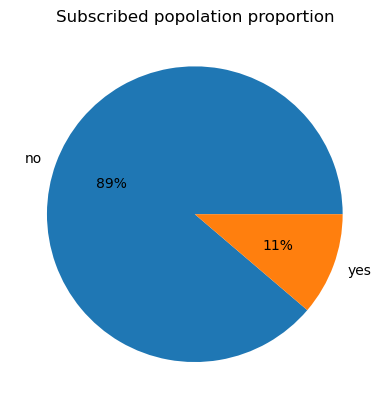

In [28]:
# checking the proportion of the market share for each company
label = ["no","yes"]
plt.pie(counts, labels=label, autopct='%.0f%%')
plt.title("Subscribed popolation proportion")
plt.show()

# catagorical and numerical data exploration separately

In [29]:
# separate numerical and catagorical variables/features from the given data frame
cat_features = []
num_features=[]
for variable, i in enumerate(final_df.dtypes.to_list()):
    if i == 'object':
        cat_features.append(final_df.columns[variable])
    else:
        num_features.append(final_df.columns[variable])
    
print('Catagorical Features:', cat_features, '\n') # print out all the variables in catagorical features
print('Numerical Features:', num_features) # printing all the variables in numerical features

Catagorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] 

Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [30]:
# separate data frames for numerical and catagorical variables
cat_features_df = final_df[cat_features]
num_features_df = final_df[num_features]

In [31]:
# display both data frames to lear
display(cat_features_df)
display(num_features_df)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
45302,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent,no
45303,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent,no
45304,student,single,high.school,no,no,no,cellular,may,mon,failure,no
45305,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent,no


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
45302,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1
45303,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1
45304,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1
45305,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1


In [32]:
# checking what looks like the intities in each catagorical features
for col in cat_features_df.columns:
    print(cat_features_df[col].value_counts(), '\n') # ('\n') from stackoverflow

admin.           11434
blue-collar      10138
technician        7434
services          4362
management        3248
retired           1886
entrepreneur      1604
self-employed     1580
housemaid         1170
unemployed        1125
student            957
unknown            369
Name: job, dtype: int64 

married     27437
single      12721
divorced     5058
unknown        91
Name: marital, dtype: int64 

university.degree      13432
high.school            10436
basic.9y                6619
professional.course     5778
basic.4y                4605
basic.6y                2520
unknown                 1898
illiterate                19
Name: education, dtype: int64 

no         35903
unknown     9400
yes            4
Name: default, dtype: int64 

yes        23751
no         20461
unknown     1095
Name: housing, dtype: int64 

no         37299
yes         6913
unknown     1095
Name: loan, dtype: int64 

cellular     28796
telephone    16511
Name: contact, dtype: int64 

may    15147
jul     788

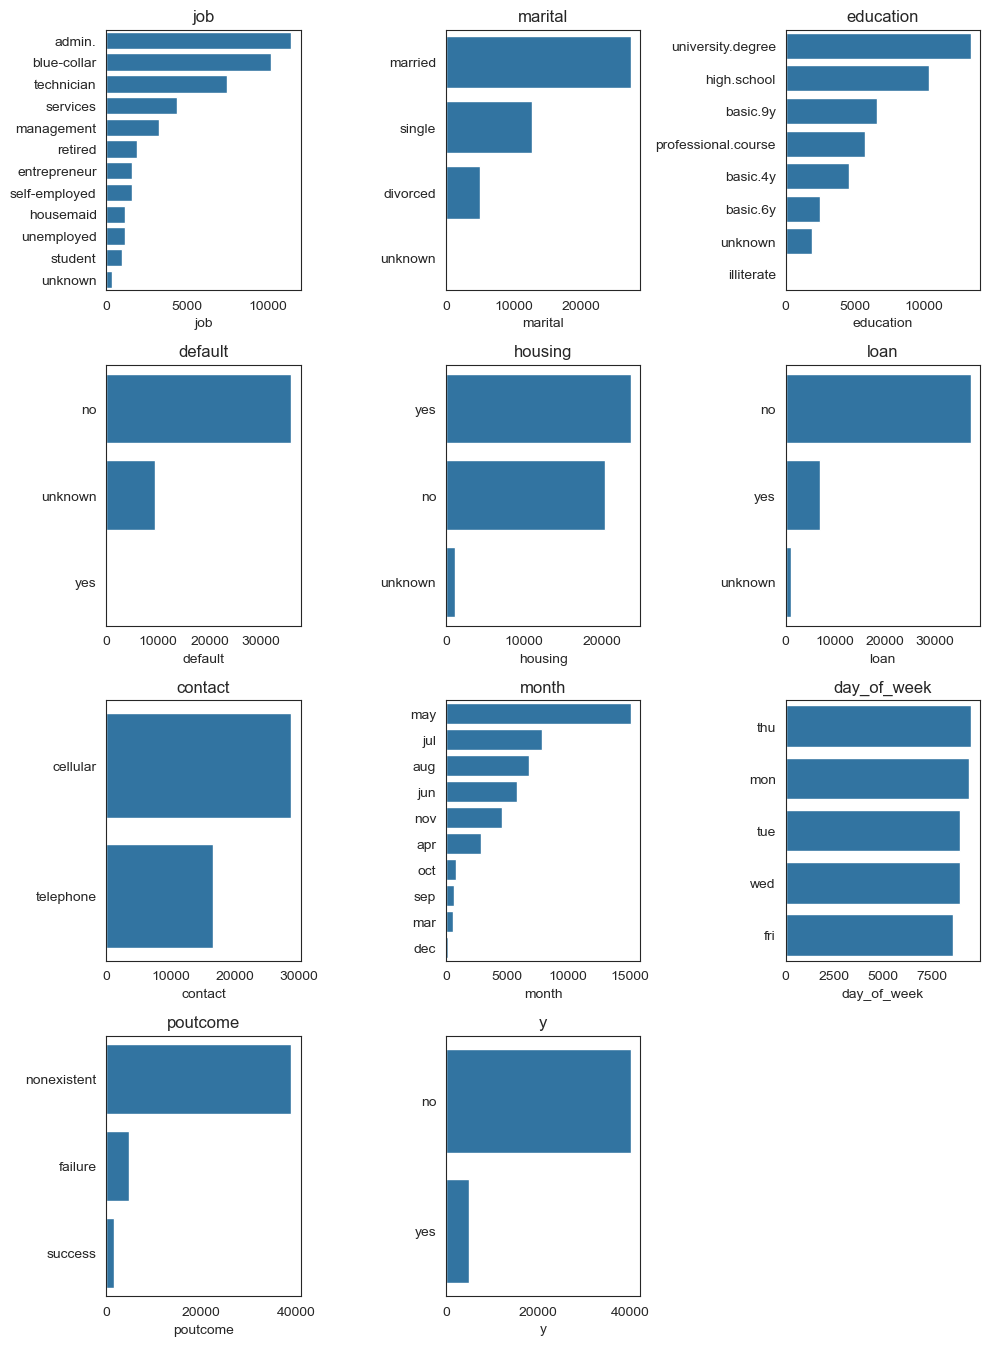

In [33]:
# ploting catagorical features to see my unknowns, which is missing value according to the documentation in the data set
fig = plt.figure(figsize = (10, 40))# 
sns.set_style('white')
np = 1# n is numbers of plots
for feature in cat_features_df.columns:   
    ax = plt.subplot(12, 3, np)
    sns.barplot(x = final_df[feature].value_counts(), y = final_df[feature].value_counts().index, color='tab:blue')
    plt.title(feature)
    plt.tight_layout()
    np +=1
plt.show()

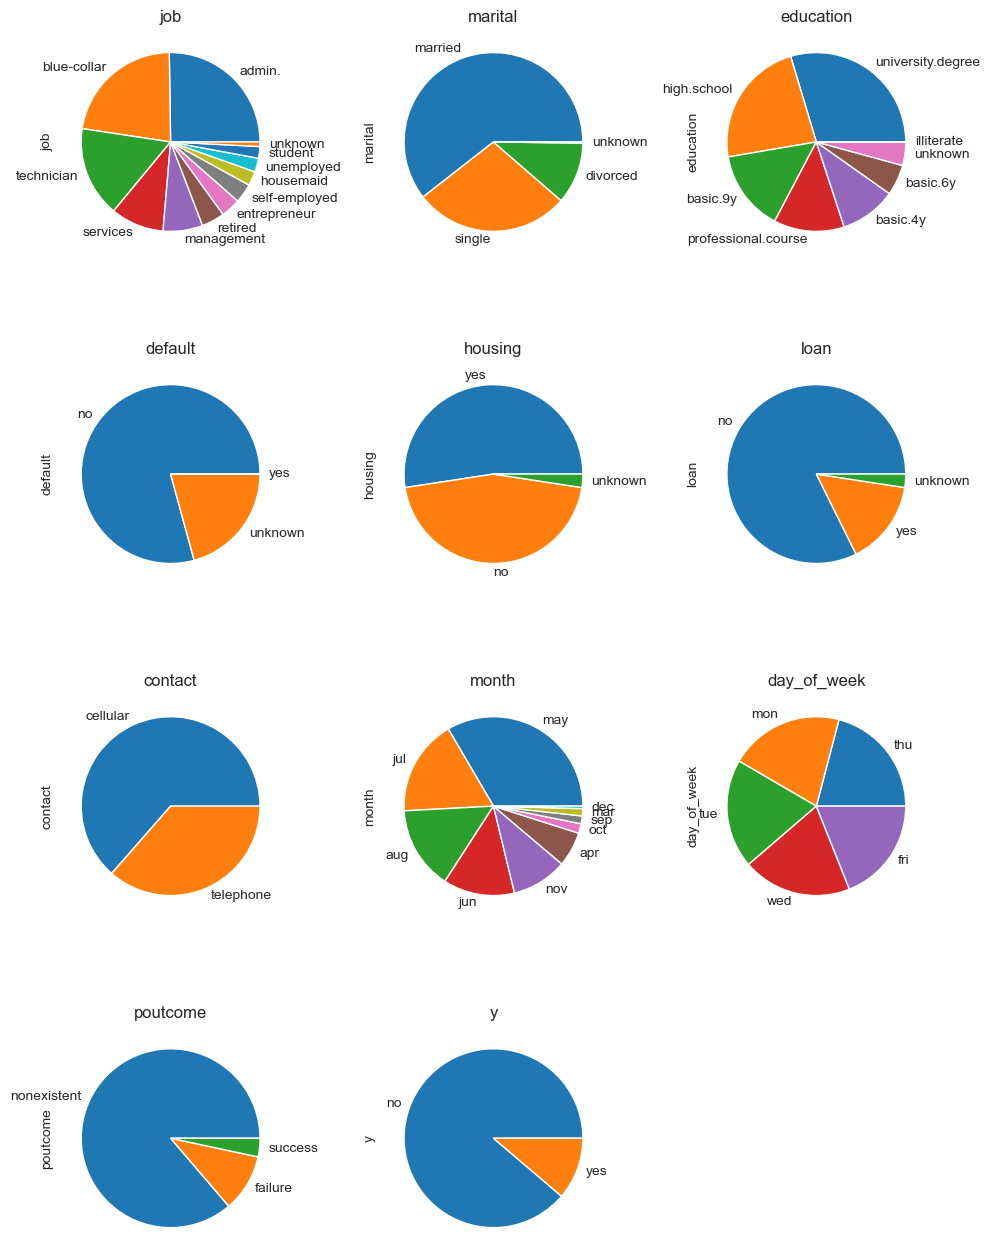

In [34]:
fig = plt.figure(figsize = (10, 40))# 
sns.set_style('dark')
np = 1# n is numbers of plots
for feature in cat_features_df.columns:   
    ax = plt.subplot(12, 3, np)
    final_df[feature].value_counts().plot(kind='pie')
    plt.title(feature)
    plt.tight_layout()
    np +=1
plt.show()

There are some unkwon values in most of the catagorical features as depected in the above plots. 

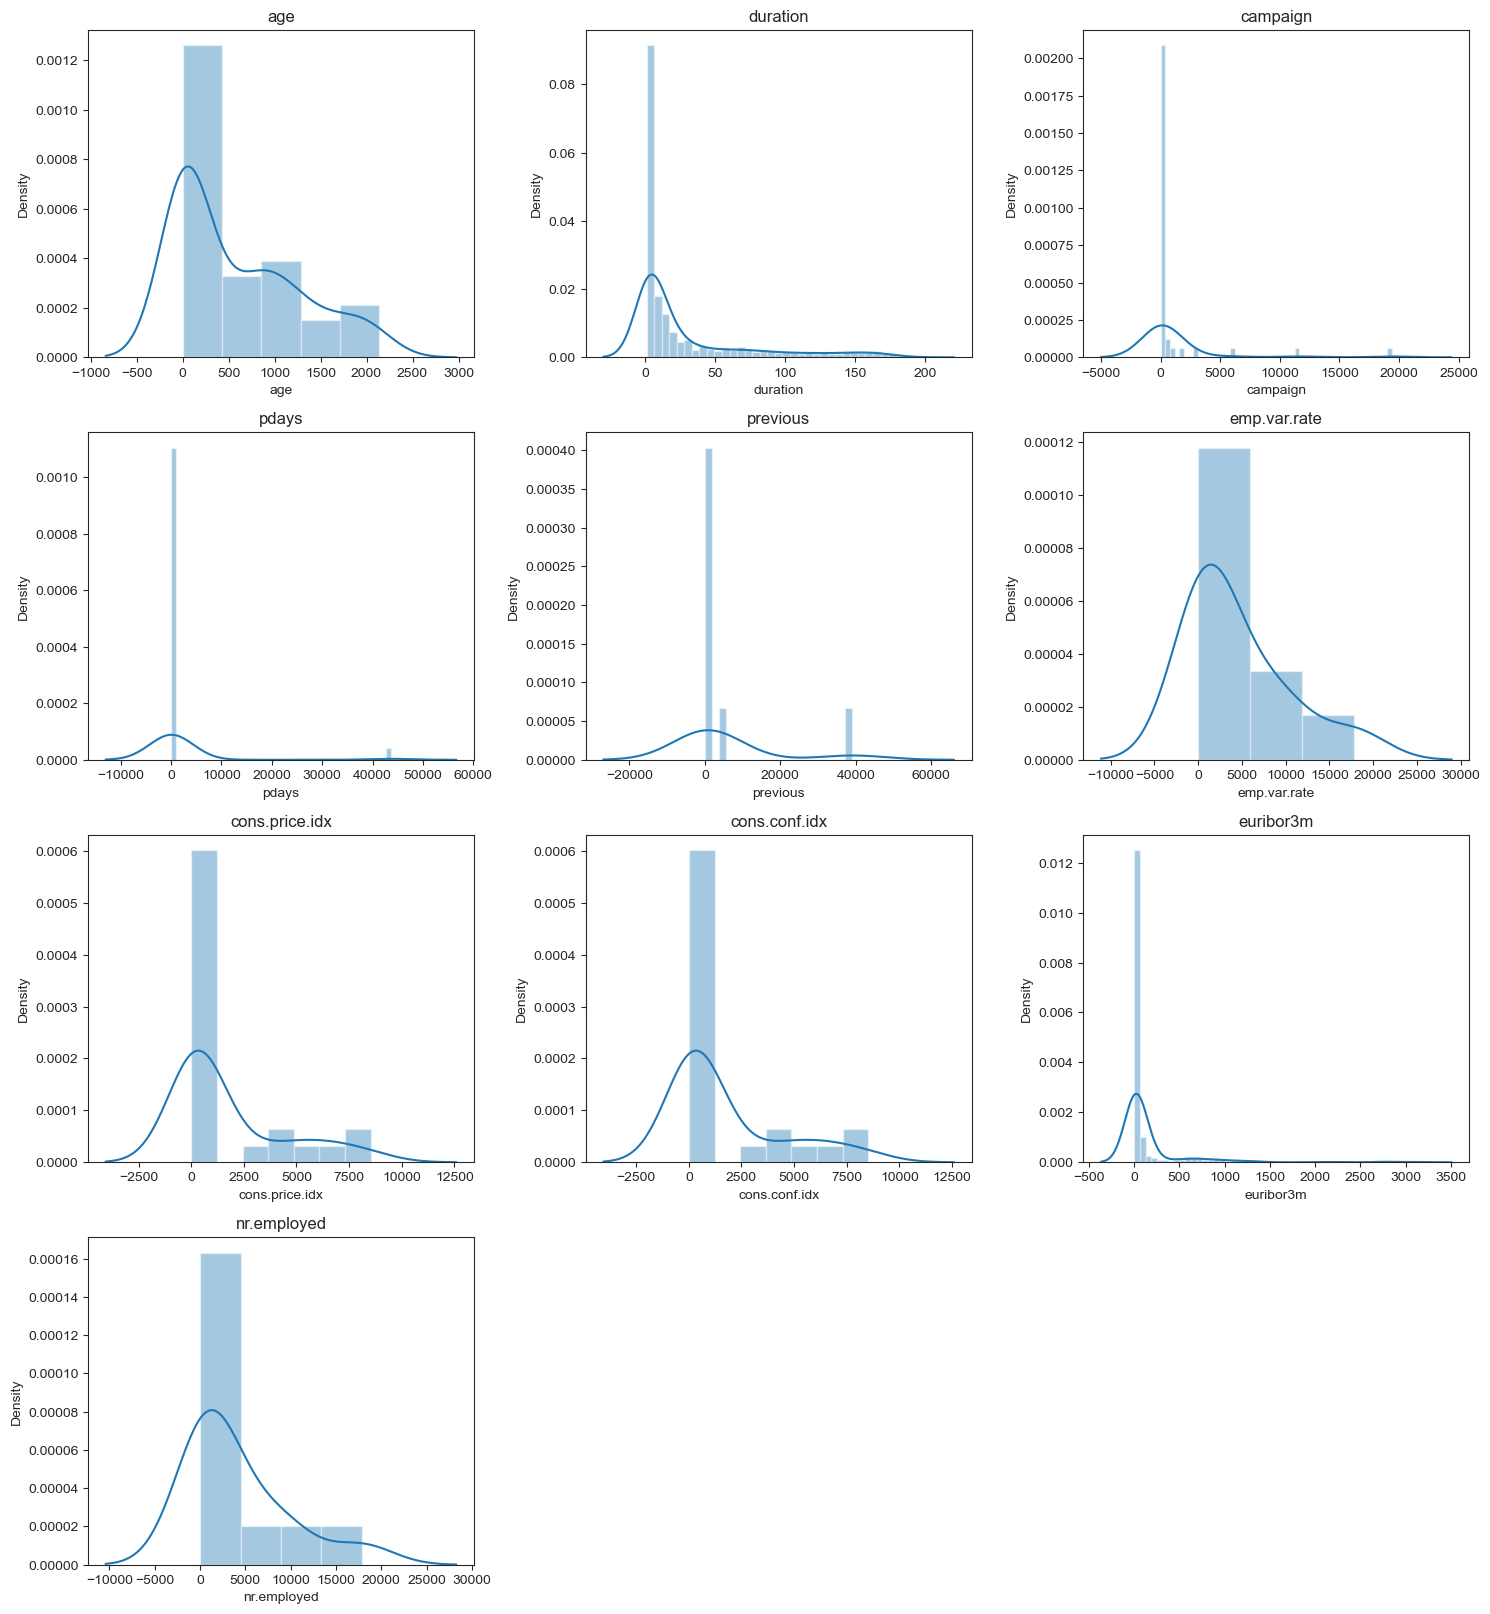

In [35]:
# ploting numerical features to understand the behaviour of each variable
fig = plt.figure(figsize = (15, 40))# 
sns.set_style('ticks')
np = 1# np is numbers of plots
for feature in num_features_df.columns:
    ax = plt.subplot(10, 3, np)
    sns.distplot(final_df[feature].value_counts())
    plt.title(feature)
    plt.tight_layout()
    np +=1
plt.show()

most of numerical features looks like right skewed but no significant outliers

Make some analysis how the trarget variable afected with catagorical features

In [36]:
final_df.groupby('education').y.value_counts()

education            y  
basic.4y             no      4139
                     yes      466
basic.6y             no      2315
                     yes      205
basic.9y             no      6103
                     yes      516
high.school          no      9308
                     yes     1128
illiterate           no        15
                     yes        4
professional.course  no      5118
                     yes      660
university.degree    no     11597
                     yes     1835
unknown              no      1621
                     yes      277
Name: y, dtype: int64

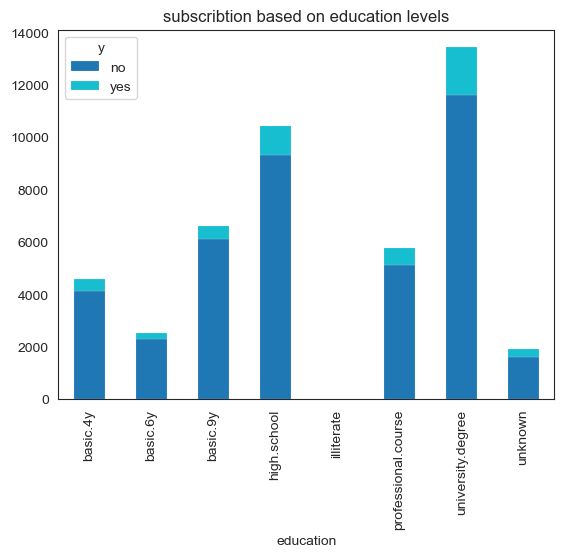

In [37]:
sns.set_style('white')
final_df.groupby('education').y.value_counts().unstack().plot(kind='bar',stacked=True, color=['tab:blue', 'tab:cyan'], lw=0.1)
plt.title("subscribtion based on education levels")
plt.show()

Hischool graduates and university degree holders are most likely to open an account with the bank and bothe of the take a bit larger proportion of the population

In [38]:
final_df.groupby('job').y.value_counts()

job            y  
admin.         no     9949
               yes    1485
blue-collar    no     9439
               yes     699
entrepreneur   no     1472
               yes     132
housemaid      no     1053
               yes     117
management     no     2890
               yes     358
retired        no     1414
               yes     472
self-employed  no     1418
               yes     162
services       no     4004
               yes     358
student        no      663
               yes     294
technician     no     6624
               yes     810
unemployed     no      962
               yes     163
unknown        no      328
               yes      41
Name: y, dtype: int64

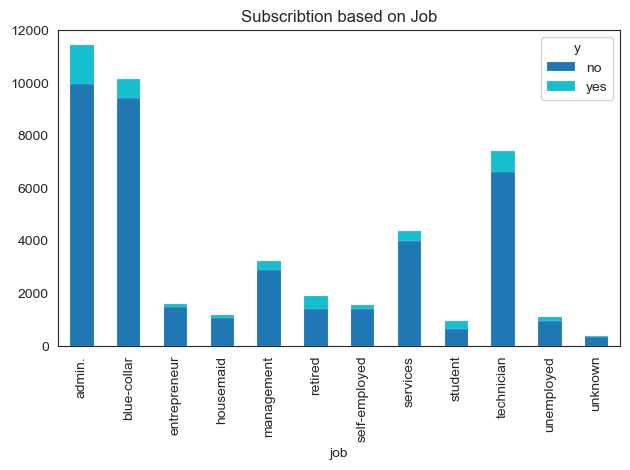

In [39]:
# the relation ship between ctagorical features and traget variable
final_df.groupby('job').y.value_counts().unstack().plot(kind='bar',stacked=True, color=['tab:blue', 'tab:cyan'], lw =0.1)
plt.title('Subscribtion based on Job')
plt.tight_layout()
plt.show()

Administarators, blue-collar and technicians are most likely subscribe the bank and they took the lione share of the population

In [40]:
final_df.groupby('marital').y.value_counts()

marital   y  
divorced  no      4539
          yes      519
married   no     24653
          yes     2784
single    no     10946
          yes     1775
unknown   no        78
          yes       13
Name: y, dtype: int64

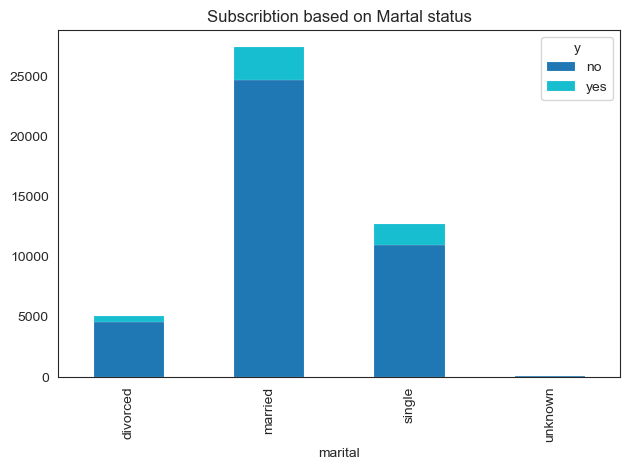

In [41]:
final_df.groupby('marital').y.value_counts().unstack().plot(kind='bar',stacked=True, color=['tab:blue', 'tab:cyan'], lw =0.1)
plt.title('Subscribtion based on Martal status')
plt.tight_layout()
plt.show()

In [42]:
final_df.groupby('housing').y.value_counts()

housing  y  
no       no     18233
         yes     2228
unknown  no       979
         yes      116
yes      no     21004
         yes     2747
Name: y, dtype: int64

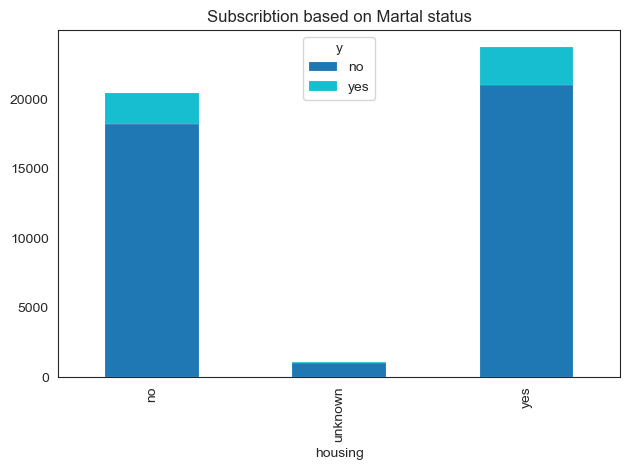

In [43]:
final_df.groupby('housing').y.value_counts().unstack().plot(kind='bar',stacked=True, color=['tab:blue', 'tab:cyan'], lw =0.1)
plt.title('Subscribtion based on Martal status')
plt.tight_layout()
plt.show()

Those who has a house, most likely subscribe the bank

In [44]:
final_df.groupby('loan').y.value_counts()

loan     y  
no       no     33075
         yes     4224
unknown  no       979
         yes      116
yes      no      6162
         yes      751
Name: y, dtype: int64

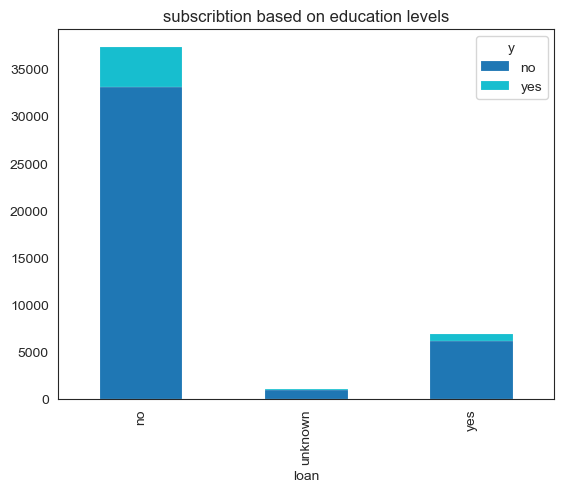

In [45]:
sns.set_style('white')
final_df.groupby('loan').y.value_counts().unstack().plot(kind='bar',stacked=True, color=['tab:blue', 'tab:cyan'], lw=0.1)
plt.title("subscribtion based on education levels")
plt.show()

The larger portion of the population doesn't have loan and most likely sign most likely subscribe the bank

<Figure size 1000x4000 with 0 Axes>

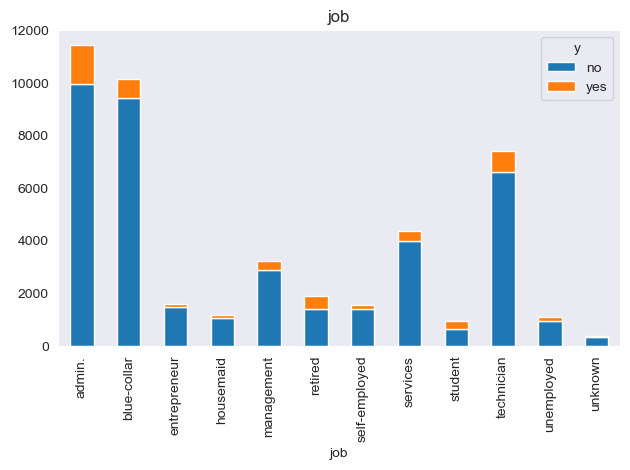

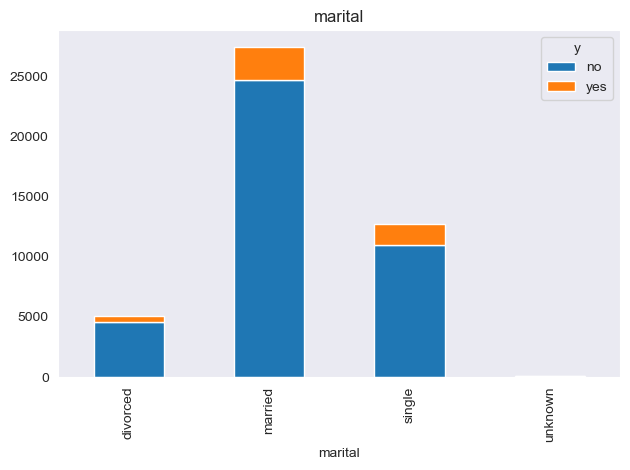

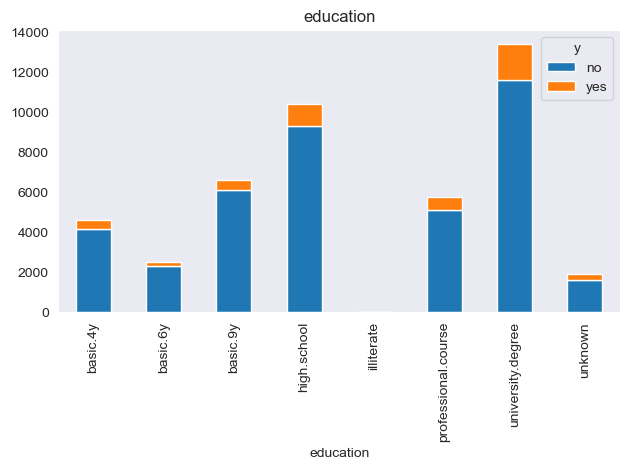

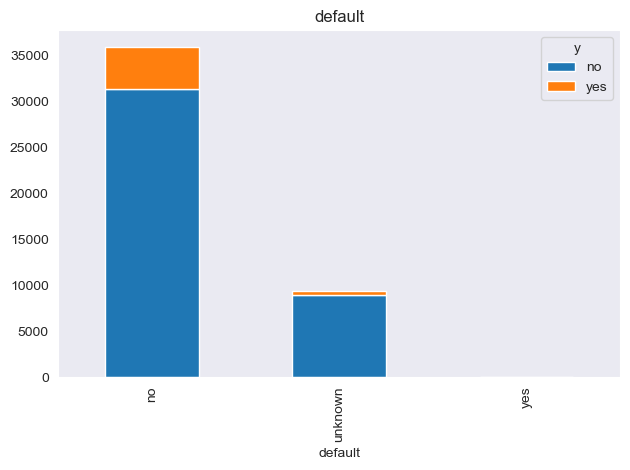

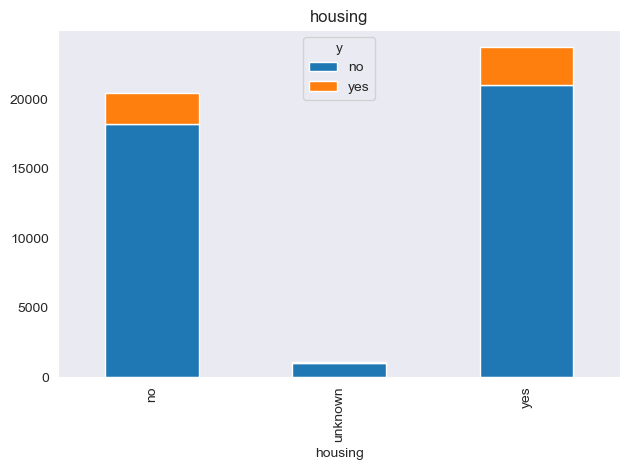

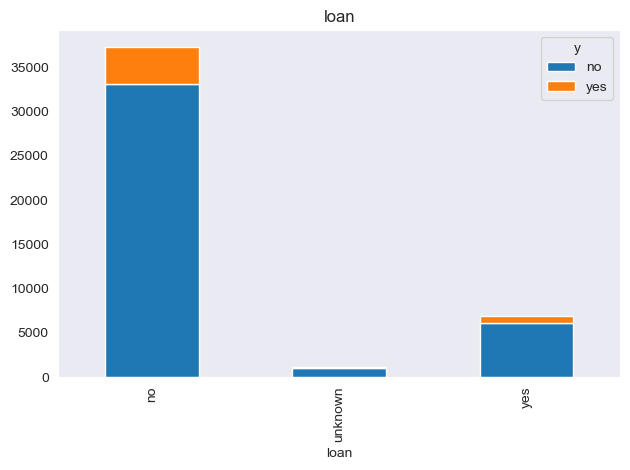

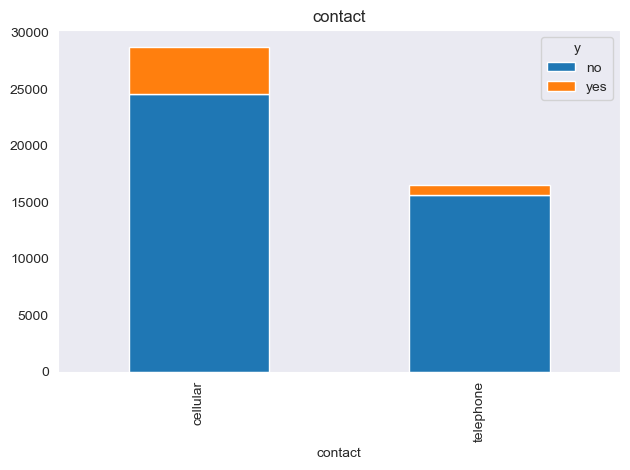

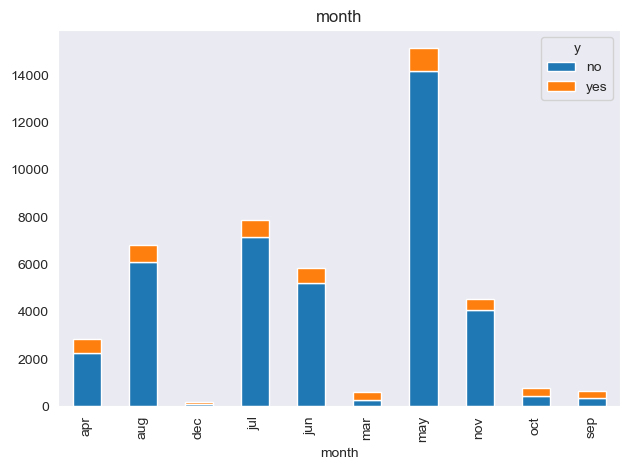

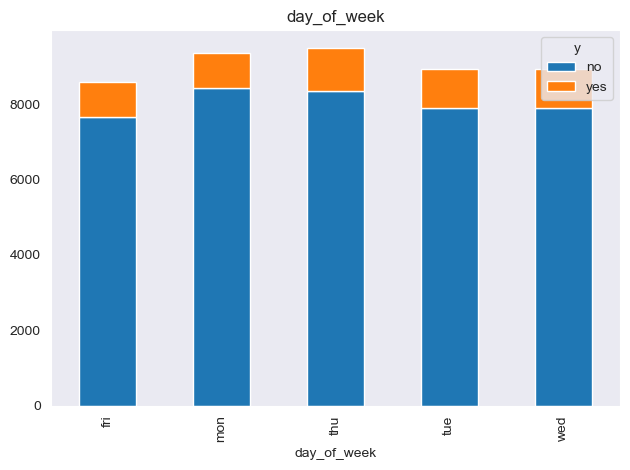

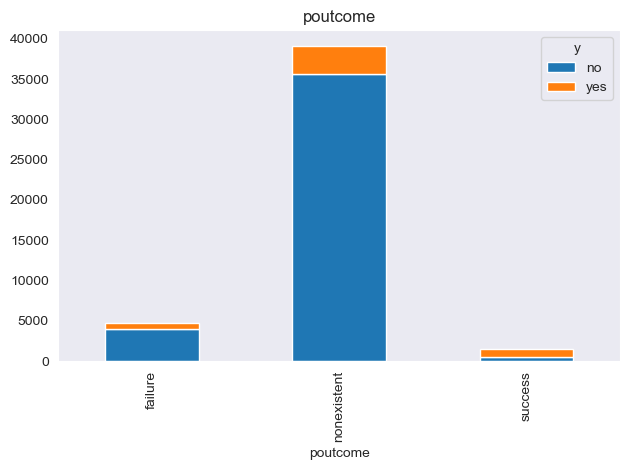

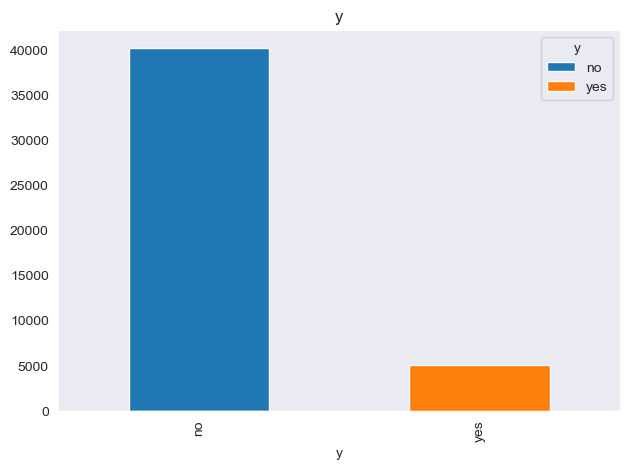

In [46]:
# observing each catagorical variables/features in graphs 
fig = plt.figure(figsize = (10, 40))# 
sns.set_style('dark')
for feature in cat_features_df.columns:   
    final_df.groupby(feature).y.value_counts().unstack().plot(kind='bar', stacked=True)
    plt.title(feature)
    plt.tight_layout()
plt.show()

The goal of the above stacked graph is to understand the proportion of subscribed and un subscribed population in each catagorical variable.

<Figure size 1200x4000 with 0 Axes>

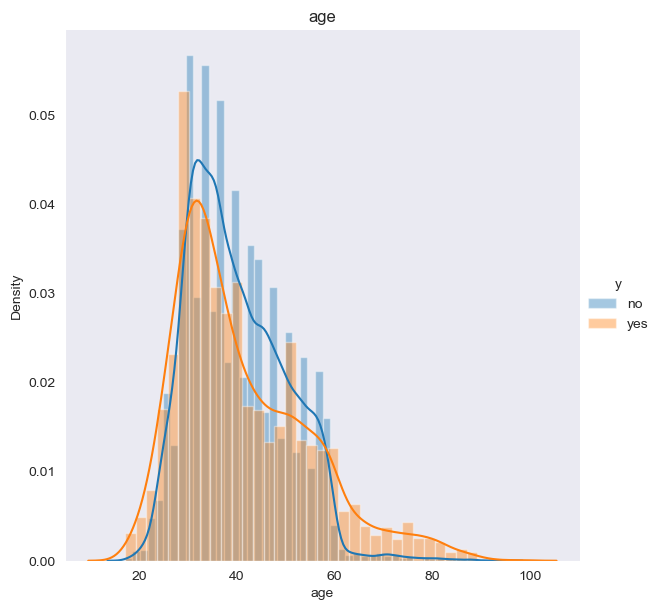

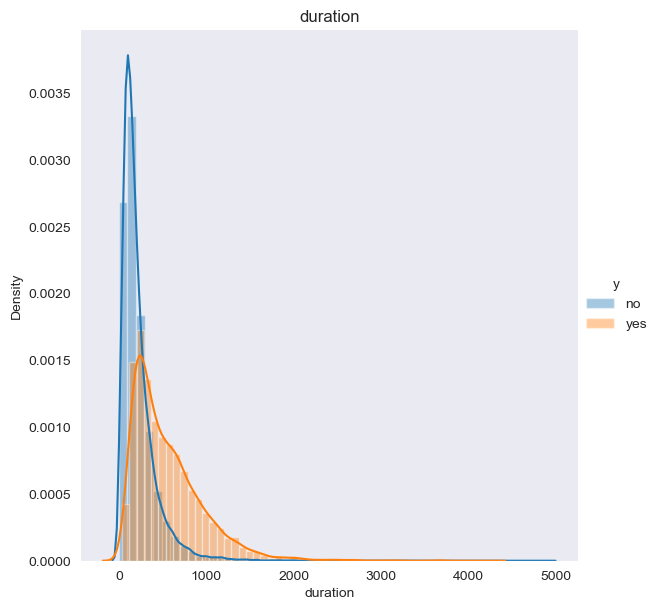

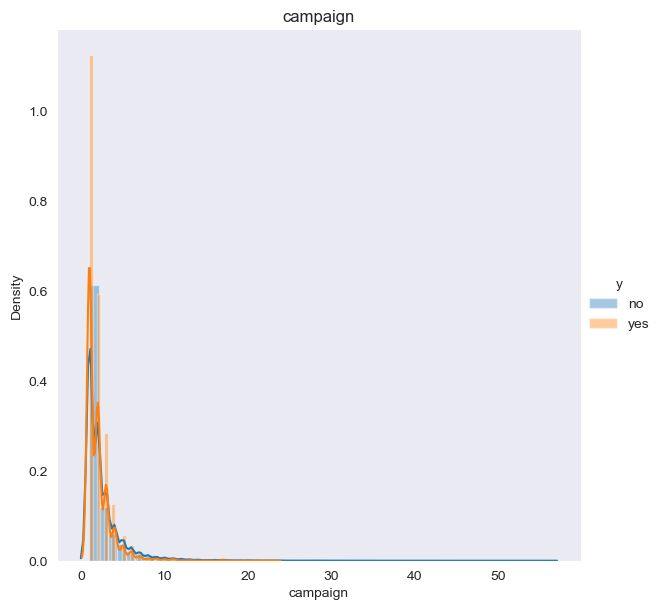

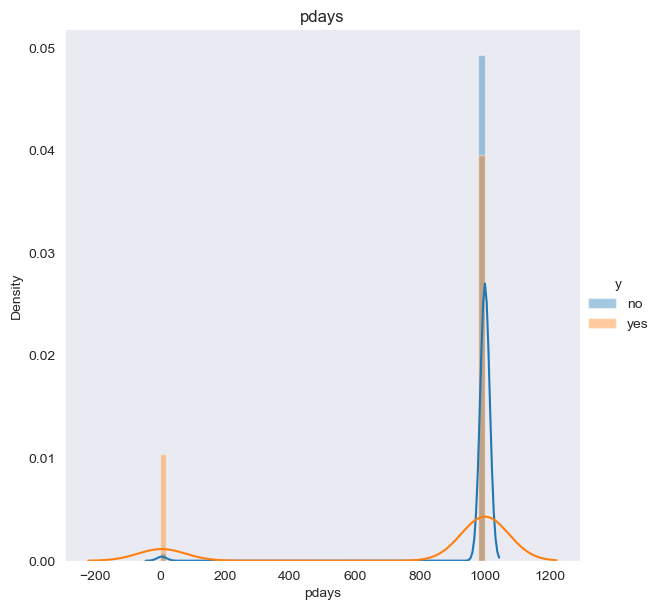

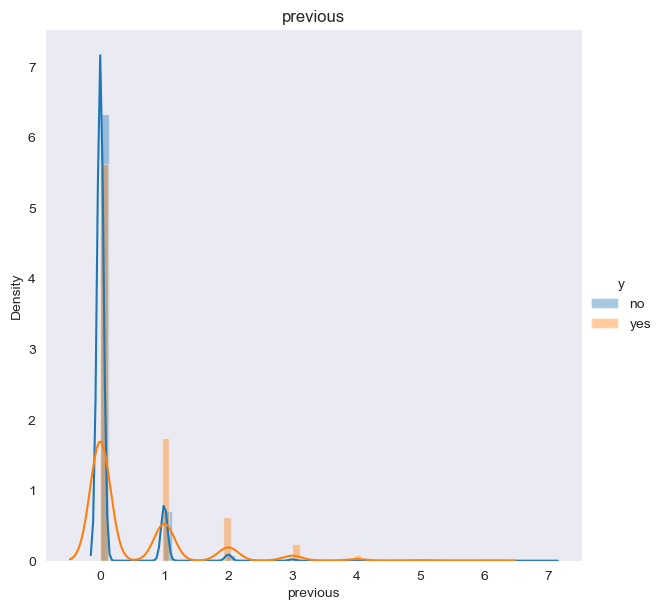

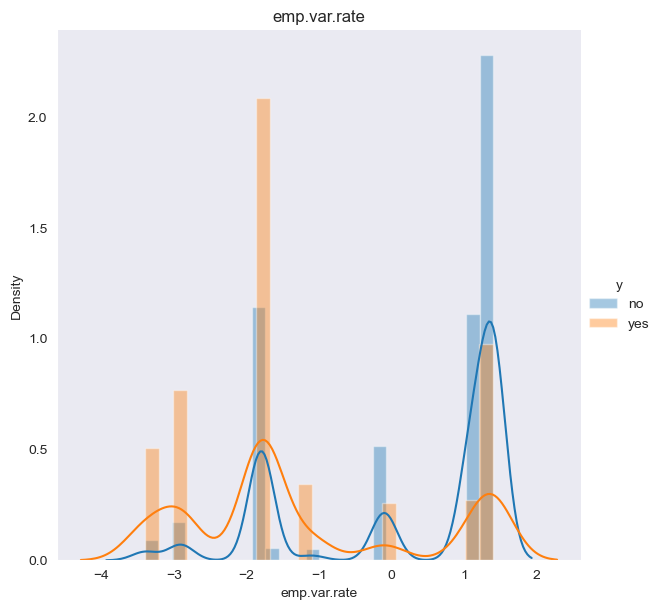

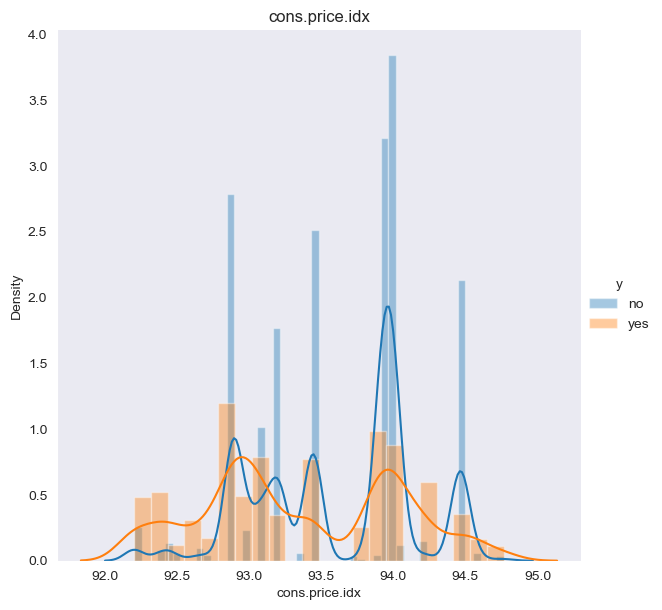

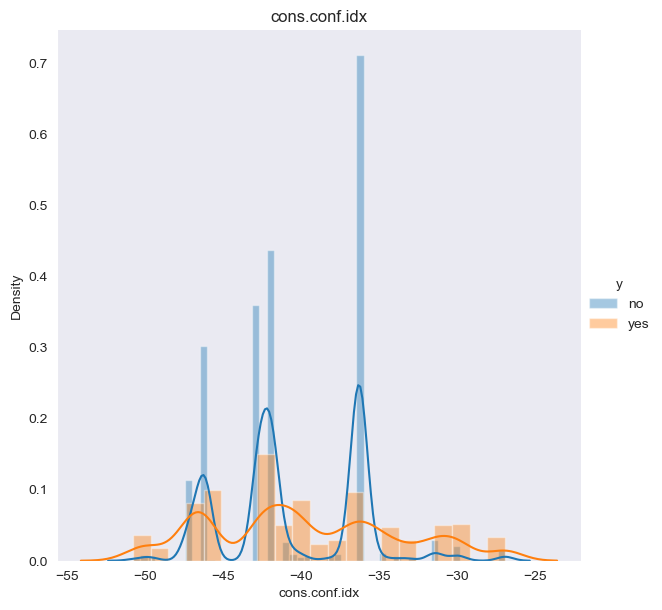

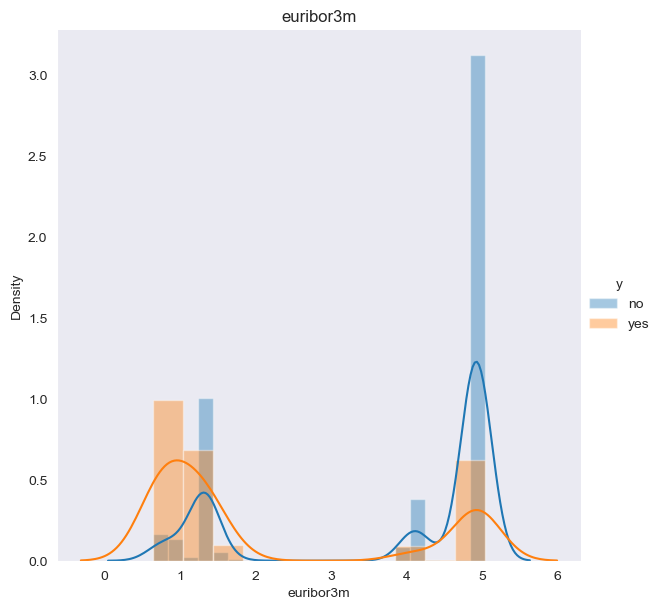

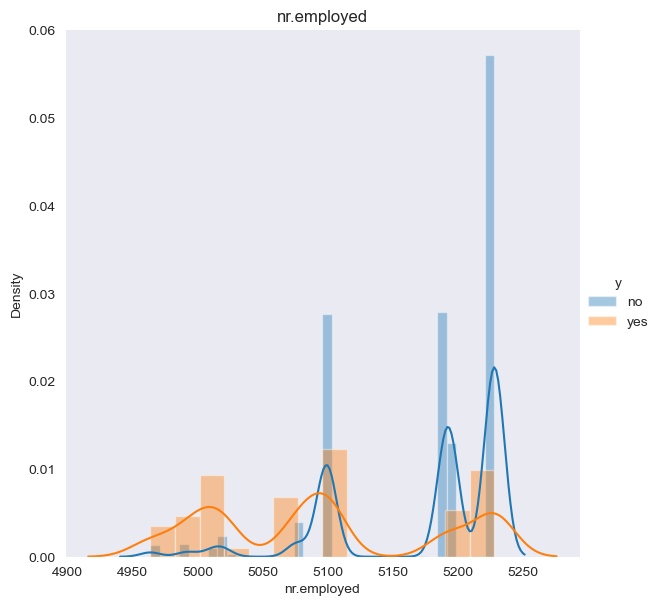

In [47]:
# checking how numerical features afects traget variable
fig = plt.figure(figsize = (12, 40))
for feature in num_features_df.columns:
    sns.FacetGrid(final_df, hue='y', height = 6) \
    .map(sns.distplot, feature) \
    .add_legend()
    plt.title(feature)    
plt.show()


Text(0.5, 1.0, 'Contact Duration vs Age')

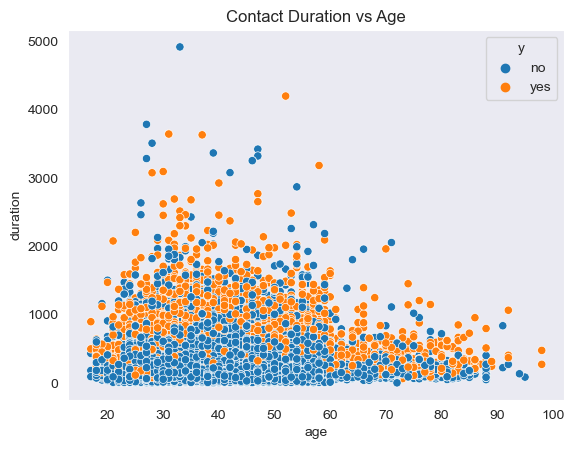

In [48]:
# checking what looks like the calling duration based on age
sns.scatterplot(data = final_df, x ='age', y = 'duration', hue = 'y' )
plt.title("Contact Duration vs Age")

between 20 to 55 years old tends to subscribe if we talk to them a bit longer. on the other hand 60+ years old likely subscribe in less amount of time 

Text(0.5, 1.0, 'Duration of Contact vs numbers of campaigns')

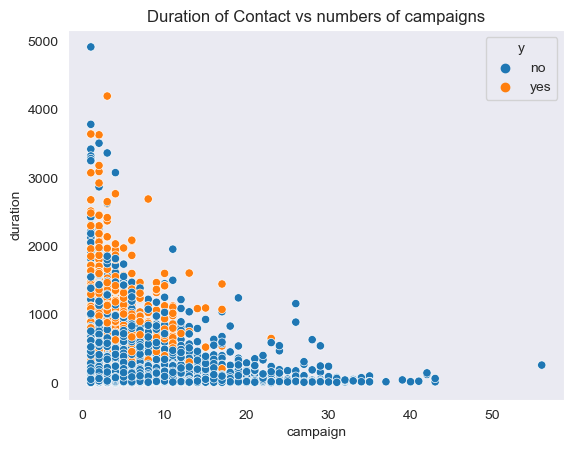

In [49]:
# checking how long they want to talk in repeated calls
sns.scatterplot(data = final_df, x ='campaign', y ='duration', hue = 'y' )
plt.title("Duration of Contact vs numbers of campaigns")

less campaign and longer duration looks a good stratrge to get them subscribe.

In [50]:
#learn the variable from statistics perspective and see if most of the variabls are in 3rd quartile and well
#as any posiible outlier
num_features_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000,45307.000000
mean,40.032203,258.148917,2.564835,962.288785,0.174543,0.082166,93.576032,-40.502282,3.621297,5166.985525
std,10.411407,258.864200,2.752261,187.370863,0.499364,1.570231,0.578881,4.625101,1.734350,72.380791
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [51]:
# checking correlation with numerical features to make it sure we are considering the approprate variables
final_df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.002866,0.003009,-0.035210,0.026972,-0.002056,0.000741,0.126578,0.008445,-0.019948
duration,0.002866,1.000000,-0.072823,-0.047515,0.021105,-0.028047,0.006326,-0.010534,-0.032845,-0.044653
campaign,0.003009,-0.072823,1.000000,0.053106,-0.080214,0.152860,0.129258,-0.011910,0.137162,0.145512
pdays,-0.035210,-0.047515,0.053106,1.000000,-0.587447,0.270960,0.076978,-0.091407,0.297315,0.373497
previous,0.026972,0.021105,-0.080214,-0.587447,1.000000,-0.419777,-0.199256,-0.050957,-0.454733,-0.502571
emp.var.rate,-0.002056,-0.028047,0.152860,0.270960,-0.419777,1.000000,0.773505,0.195950,0.972069,0.906042
cons.price.idx,0.000741,0.006326,0.129258,0.076978,-0.199256,0.773505,1.000000,0.057798,0.685404,0.517439
cons.conf.idx,0.126578,-0.010534,-0.011910,-0.091407,-0.050957,0.195950,0.057798,1.000000,0.277587,0.101111
euribor3m,0.008445,-0.032845,0.137162,0.297315,-0.454733,0.972069,0.685404,0.277587,1.000000,0.944899
nr.employed,-0.019948,-0.044653,0.145512,0.373497,-0.502571,0.906042,0.517439,0.101111,0.944899,1.000000


<AxesSubplot: >

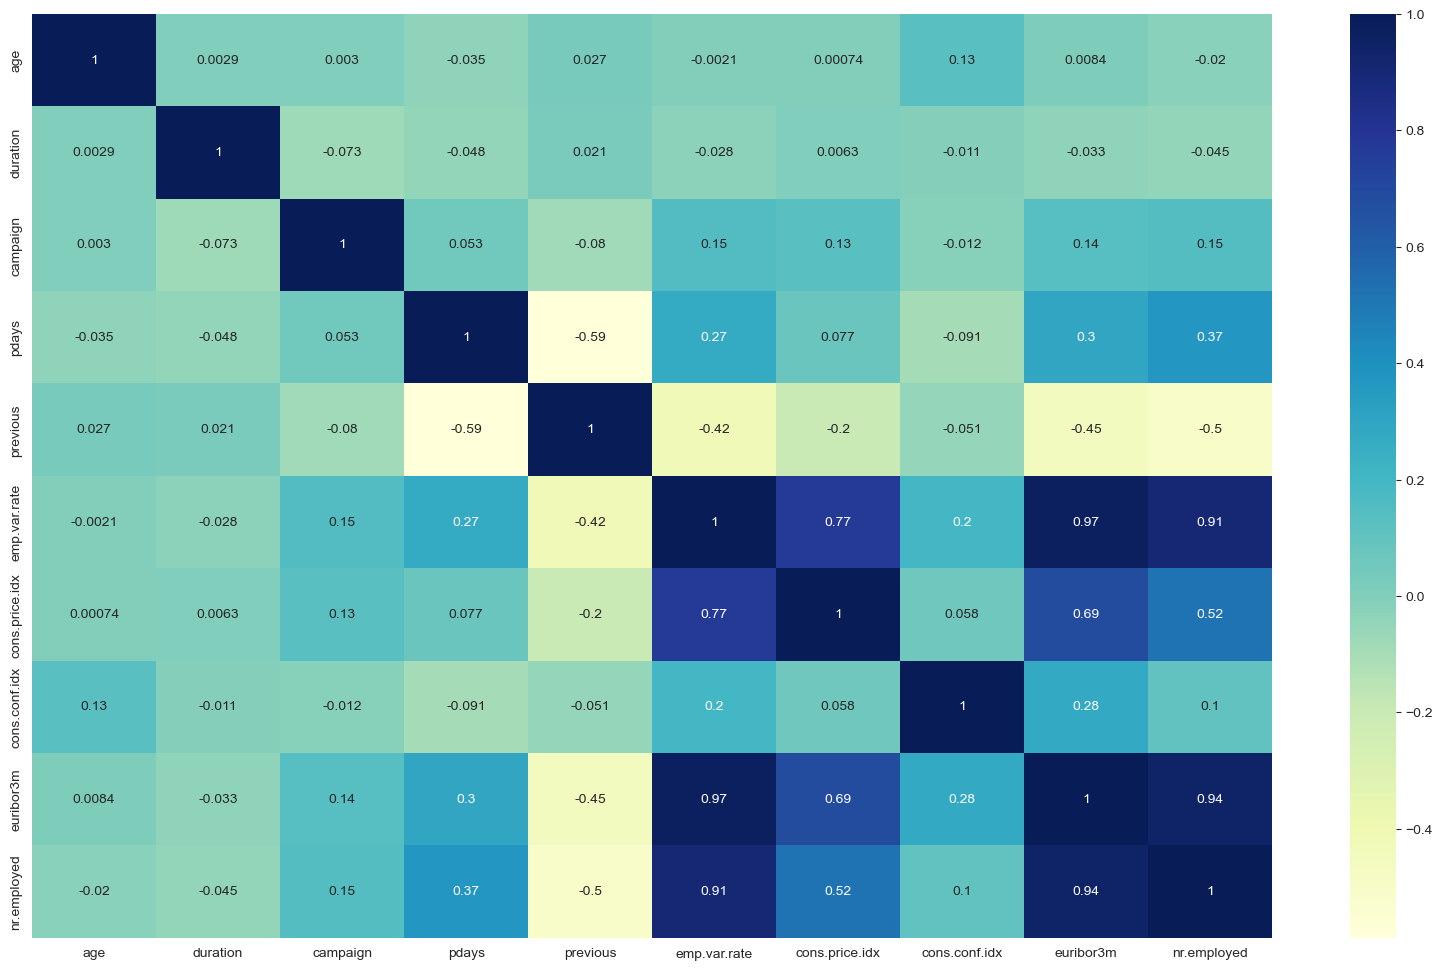

In [52]:
plt.figure(figsize=(20,12))
sns.heatmap(final_df.corr(),annot=True,cmap='YlGnBu')

Most of Macro-economic  or socio-economic variables are correlated each other

# preprocessing and preparing for ML models 


# Imputation

According to the documatation (source from UCI ML repo)any value that assigning unknown is missing value. There are several missing values, specially in catagorical features.


In [53]:
#  missing "unknown" values specifically from catagoric features 
for feature in cat_features_df.columns:
    print(feature, " "  , (cat_features_df[feature] =='unknown').sum().sum())

job   369
marital   91
education   1898
default   9400
housing   1095
loan   1095
contact   0
month   0
day_of_week   0
poutcome   0
y   0


Job,Education, marital, default, loan and housing has missing values and needs to fill in approprate values
I will take few assumptions

1. Job could depend on education levels and age
2. personal loan probably depend on job
3. housing loan may depend on job or personal loan
4. default credit may depend on job
5. marital depend on job

In [54]:
print(final_df['job'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


From the abouve table m ost of administrator and managment have university degree but admin took the larger share of university graduates. technician also filled by a lot of professional cores graduates. Generally I will us the above table to impute unknowns

In [55]:
# cross-tab.
# found and learned it from pandas documentation
pd.crosstab(final_df.job, final_df.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,85,171,543,3640,1,401,6320,273
blue-collar,2540,1578,3947,967,8,502,100,496
entrepreneur,155,76,233,251,2,149,674,64
housemaid,526,86,99,185,1,67,161,45
management,113,93,186,339,0,96,2283,138
retired,656,81,156,300,4,269,317,103
self-employed,104,27,248,133,3,180,852,33
services,148,238,444,2936,0,243,191,162
student,28,13,104,392,0,51,182,187


In [56]:
# impute missing values in education and job
# I took some portion of this code from stakoverflow. someone asked this questions and multiple people replied it in differet 
# answers and I learned and did pretty similar but it may not be exact. I want to let you know.
df = final_df.copy()

df.loc[(df['education'] == 'unknown') & ((df['job'] == 'admin.') |
                                         (df['job'] == 'management')| 
                                         (df['job'] =='self-employed')), 'education'] = 'university.degree'  

df.loc[(df['education'] == 'unknown') & (df['job'] =='blue-collar'), 'education'] = 'basic.9y'

df.loc[(df['education'] == 'unknown') & (df['job'] =='technician'), 'education'] = 'professional.course'

df.loc[(df['education'] == 'unknown') & ((df['job'] =='student') |
                                         (df['job'] =='housemaid')|
                                         (df['job'] =='services')|
                                         (df['job'] == 'entrepreneur')|
                                         (df['job'] =='unemployed') | 
                                         (df['job'] == 'retired')), 'education'] = 'high.school'
######

df.loc[(df['job'] == 'unknown') & ((df['education'] =='basic.4y')), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & ((df['education'] =='high.school')|
                                   (df['education'] =='university.degree')), 'job'] = 'admin.'
df.loc[(df['job'] == 'unknown') & ((df['education'] =='basic.4y')|
                                   (df['education'] =='basic.9y')|
                                   (df['education'] =='basic.6y')|
                                   (df['education'] =='high.school')|
                                    (df['education'] =='professional.course')), 'job'] = 'blue-collar'


# age group unknown imputation

#marital status unknown imputation
df.loc[(df['marital'] == 'unknown'), 'marital'] = 'married'
#df.loc[(df['marital'] == 'unknown'), 'job'] = 'admin.'

#imputation of loan
df.loc[(df['loan'] == 'unknown'), 'loan'] = 'no'
df.loc[(df['job'] == 'unknown'), 'job'] = 'admin.'

#imputation default parameter
df.loc[(df['default'] == 'unknown'), 'default'] = 'no'
df.loc[(df['job'] == 'unknown'), 'job'] = 'admin.'

# imputation of housing based on education
df.loc[(df['housing'] == 'unknown') & ((df['job'] == 'admin.')| 
                                       (df['job'] =='blue-collar')|
                                       (df['job'] =='technician')|
                                       (df['job'] =='management') |
                                        (df['job'] =='housemaid')|
                                        (df['job'] =='services')|
                                        (df['job'] == 'entrepreneur')|
                                        (df['job'] =='unemployed') | 
                                        (df['job'] == 'retired')|
                                        (df['job']== 'self-employed')), 'housing'] = 'yes'
df.loc[(df['housing'] == 'unknown') & ((df['job'] =='student')), 'housing'] = 'no'

In [57]:
pd.crosstab(df.job, df.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,85,171,543,3683,1,401,6641,144
blue-collar,2600,1601,4480,967,8,516,100,0
entrepreneur,155,76,233,315,2,149,674,0
housemaid,526,86,99,230,1,67,161,0
management,113,93,186,339,0,96,2421,0
retired,656,81,156,403,4,269,317,0
self-employed,104,27,248,133,3,180,885,0
services,148,238,444,3098,0,243,191,0
student,28,13,104,579,0,51,182,0


In [58]:
pd.crosstab(df.job, df.marital)

marital,divorced,married,single
job,,,
admin.,1404,5957,4308
blue-collar,797,7433,2042
entrepreneur,201,1181,222
housemaid,179,857,134
management,373,2325,550
retired,379,1403,104
self-employed,149,1004,427
services,580,2545,1237
student,9,45,903


In [59]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [60]:
cat_features_df1 = df[cat_features]
num_features_df1 = df[num_features]

In [61]:
#checking numbers of unknowns after imputation.
for feature1 in cat_features_df1.columns:
    print(feature1, " "  , (cat_features_df1[feature1] =='unknown').sum().sum())


job   0
marital   0
education   144
default   0
housing   0
loan   0
contact   0
month   0
day_of_week   0
poutcome   0
y   0


Still there are few unknowns, specifically in education variable. since they come from unknow with unknown during tabulation, it was challenging to impute with any of the values. They will be droped.

In [62]:
#droping the remaining unknowns
df2 = df.loc[(df['education']!='unknown')]
data = df2.loc[(df['housing']!='unknown')]

In [63]:
cat_features_df2 = data[cat_features]
num_features_df2 = data[num_features]

In [64]:
num_features_df2.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [65]:
# checking the final data frame's unknowns
for feature2 in cat_features_df2.columns:
    print(feature2, " "  , (cat_features_df2[feature2] =='unknown').sum().sum())


job   0
marital   0
education   0
default   0
housing   0
loan   0
contact   0
month   0
day_of_week   0
poutcome   0
y   0


##### Transforming catagorical variable or changing to numbers 

In [66]:
originalFeatures = df.columns
print('original Features counts', len(originalFeatures))
print(df.columns)

original Features counts 21
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [67]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [68]:
# importing encoders from sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


In [69]:
# take a look how many lables has each variables/features
for col in cat_features_df2.columns:
    print(col,  ':', len(cat_features_df2[col].unique()), 'labels')

job : 11 labels
marital : 3 labels
education : 7 labels
default : 2 labels
housing : 2 labels
loan : 2 labels
contact : 2 labels
month : 10 labels
day_of_week : 5 labels
poutcome : 3 labels
y : 2 labels


In [70]:
 cat_features_df2.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [71]:
#features= cat_features_df2.drop(['education'], axis=1)
label_encoder = LabelEncoder()

In [72]:
# labe encoding for all catagorical variables
# Honestly I forgot the exact resource but I looked at similar examples. I believe it was in analytica. I forgot to write
# right away. 
from numpy import array
for features in cat_features_df2.columns:
     cat_features_df2[features] = list(label_encoder.fit_transform(array(list(cat_features_df2[features]))))

In [73]:
cat_features_df2.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,0,0,0,1,6,1,1,0
2,7,1,3,0,1,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,1,1,6,1,1,0


In [74]:
#combine both numerical features data fream with catagorical features data frame to make one new data frame
data_read = pd.concat([cat_features_df2, num_features_df2], axis =1)

In [75]:
data_read.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,0,0,1,6,1,1,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,7,1,3,0,0,0,1,6,1,1,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,7,1,3,0,1,0,1,6,1,1,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,1,1,0,0,0,1,6,1,1,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,7,1,3,0,0,1,1,6,1,1,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [76]:
#cheacking features to make it sure all features are includedS
data_read.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [77]:
# export the final dataframe as csv to creat an other note book in the same folder
data_read.to_csv('final_data.csv', header=True, index=False)